In [51]:
from decode_fish.imports import *
from decode_fish.funcs.file_io import *
from decode_fish.funcs.emitter_io import *
from decode_fish.funcs.utils import *
from decode_fish.funcs.evaluation import *
from decode_fish.funcs.plotting import *
from torch.utils.data import DataLoader
import seaborn as sns

import ipyvolume as ipv

In [58]:
basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/'
data_dirs = ['sim_density_fac05_1','sim_density_fac1_1','sim_density_fac2_1']

axis_names = {'jaccard':'detection accuracy (JI) %', 'rmse_vol':'localization error (nm)', 'rmse_lat':'lateral localization error (nm)', 'rmse_ax':'axial localization error (nm)', 'group_p':'N groups / N localizations','eff_3d':'3D efficiency','recall':'recall %', 'precision':'precision %'}

In [105]:
total_dict = {'FISH-quant':{}, 'DECODE':{}}
snrs = ['High SNR','Medium SNR','Low SNR']
densities = [250,500,1000,2000,4000]

for i,d in enumerate(data_dirs):
    path = Path(basedir+d+'/fq_perf_dfs.pkl')
    if path.exists():
        with open(path, 'rb') as f:
            pdict = pickle.load(f)
        densities = pdict['densities']
        total_dict['FISH-quant'][snrs[i]] = pdict['gmm']
        
    path = Path(basedir+d+'/dec2_perf_dfs.pkl')
    if path.exists():
        with open(path, 'rb') as f:
            pdict = pickle.load(f)
        densities = pdict['densities']
        total_dict['DECODE'][snrs[i]] = pdict['dec']

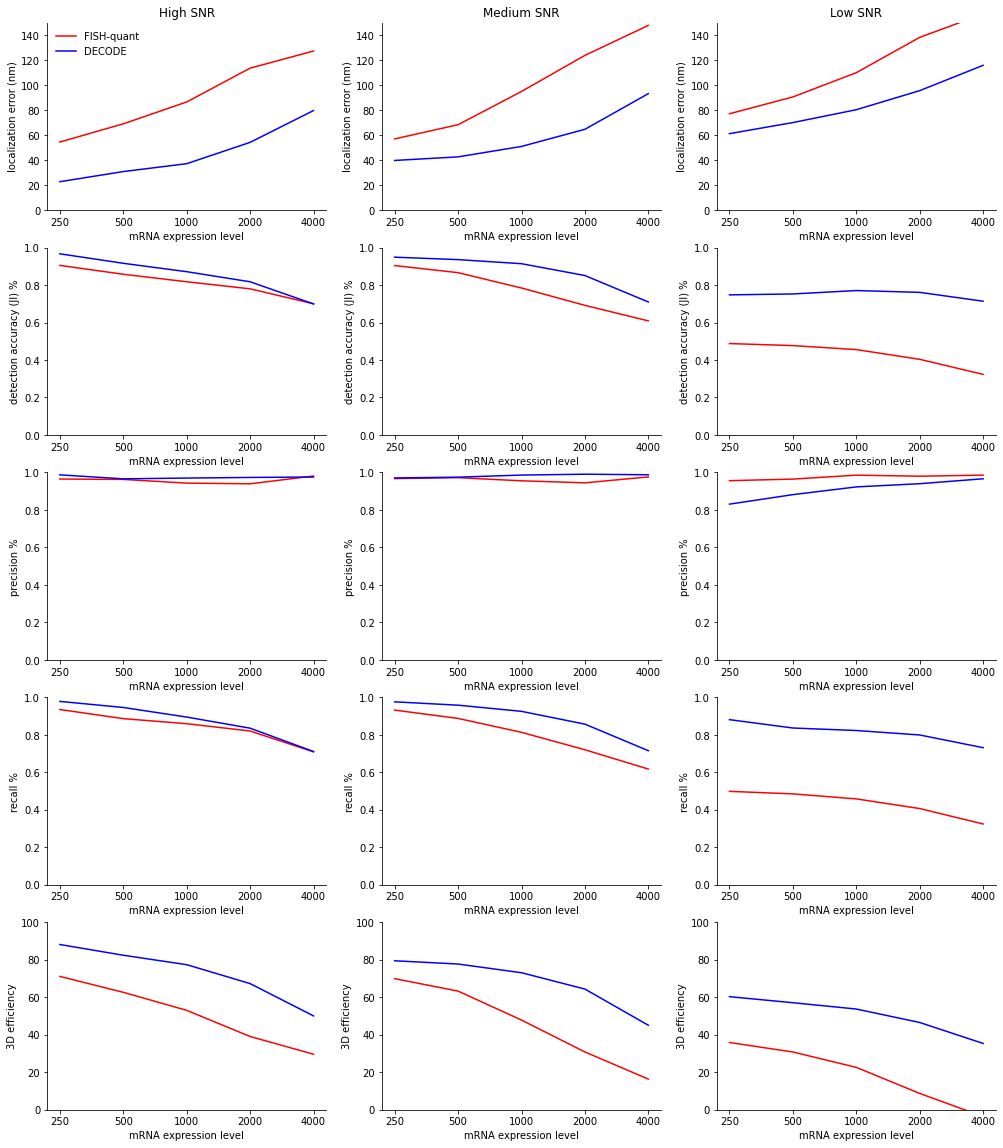

In [106]:
metrics = ['rmse_vol','jaccard','precision','recall','eff_3d']
algs = ['FISH-quant','DECODE']
alg_cols = {'FISH-quant':'red','DECODE':'blue'}
metric_lims = {'rmse_vol':[0,150],'jaccard':[0,1],'recall':[0,1],'precision':[0,1],'eff_3d':[0,100]}

plt.figure(figsize=(17,20))

for i,m in enumerate(metrics):
    for j,snr in enumerate(snrs):
        plt.subplot(len(metrics),3,j + i*3 + 1)

        for a in algs:
            if snr in total_dict[a]:
                plt.plot(np.arange(len(densities)), [d[m] for d in total_dict[a][snr]], label=a, color=alg_cols[a], linestyle='-')

        if i == 0 and j == 0:
            plt.legend(frameon=False)
        plt.ylabel(axis_names[m])
        plt.xlabel('mRNA expression level')
        plt.xticks(ticks=np.arange(len(densities)),labels=densities)
        plt.ylim(metric_lims[m])
        if i==0:
            plt.title(snr)
        sns.despine()